# **THE SPARKS FOUNDATION**




## **TASK 1 - Prediction using Supervised ML**

### *Author - Daka Saikrishna Reddy*

In [2]:
# importing the required libraries
import pandas as panda
import numpy as npy
import matplotlib.pyplot as plot 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
url = "http://bit.ly/w-data"
studentdata = panda.read_csv(url)
print("Data imported successfully:")
studentdata.head(10)

Data imported successfully:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#check if there is any null value in the dataset
studentdata.isnull == True

False

There is no null value in the Dataset so we can now visualize our Data.


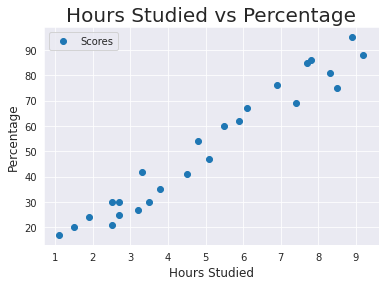

In [9]:
studentdata.plot(x='Hours', y='Scores', style='o') 
sns.scatterplot(y= studentdata['Scores'], x= studentdata['Hours'])
plot.title('Hours Studied vs Percentage',size=20)
plot.ylabel('Percentage', size=12)
plot.xlabel('Hours Studied', size=12)
plot.show()

From the above scatter plot there looks to be correlation between the 'HoursStudied' and 'Percentage', Lets plot a regression line to 
confirm the correlation.

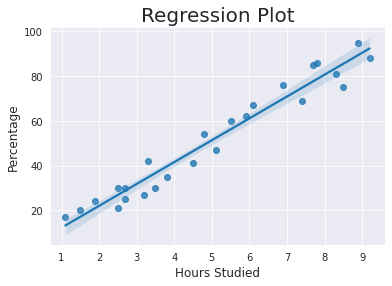

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
sns.regplot(x= studentdata['Hours'], y= studentdata['Scores'])
plot.title('Regression Plot',size=20)
plot.ylabel('Percentage', size=12)
plot.xlabel('Hours Studied', size=12)
plot.show()
print(studentdata.corr())

It is confirmed that the variables are positively correlated.

Now we have to split our data into training and testing sets, and now is finally the time to train our model.

-> Splitting the data






In [14]:
x = studentdata.iloc[:, :-1].values  
y = studentdata.iloc[:, 1].values  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

-> Training the model.

In [15]:
LinearRegressor = LinearRegression()  
LinearRegressor.fit(x_train, y_train) 

print("----Training the model completed----")

----Training the model completed----


-> Predicting the Percentage of marks

In [19]:
predict_y = LinearRegressor.predict(x_test) # Predicting the scores
prediction = panda.DataFrame({' Hours': [i[0] for i in x_test], '  Marks predicted': [k for k in predict_y]})
prediction

,Hours,Marks predicted
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


## Comparing the Predicted Marks with the Actual Marks

In [22]:
compare_scores = panda.DataFrame({'Actual Marks': y_test, 'Predicted Marks': predict_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **Visually Comparing the Predicted Marks with the Actual Marks**

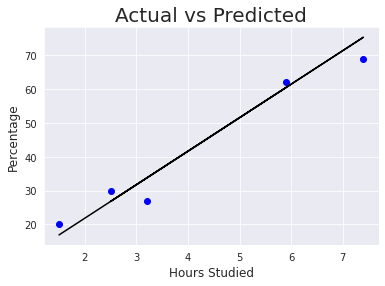

In [32]:
plot.scatter(x=x_test, y=y_test, color='blue')
plot.plot(x_test, predict_y, color='Black')
plot.title('Actual vs Predicted', size=20)
plot.ylabel('Percentage', size=12)
plot.xlabel('Hours Studied', size=12)
plot.show()

## **Evaluating the Model**

In [31]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,predict_y))

Mean absolute error:  4.183859899002982


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less**

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [30]:
hours = [9.25]
own_pred = LinearRegressor.predict([hours])
print("No of Hours = {}".format(round(9.25,3)))
print("Predicted Score = {}".format(round(own_pred[0],3)))

No of Hours = 9.25
Predicted Score = 93.692


### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 marks.